In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'plot_tail_len',
        root = '..'
    )

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
df = pd.concat([
    pd.read_csv(i)
    for i in snakemake.input['counts']
])

In [4]:
df = df.melt(id_vars=['len', 'data_source'], var_name='stats', value_name='# of reads') \
    .rename(columns={'len': 'tail length'})

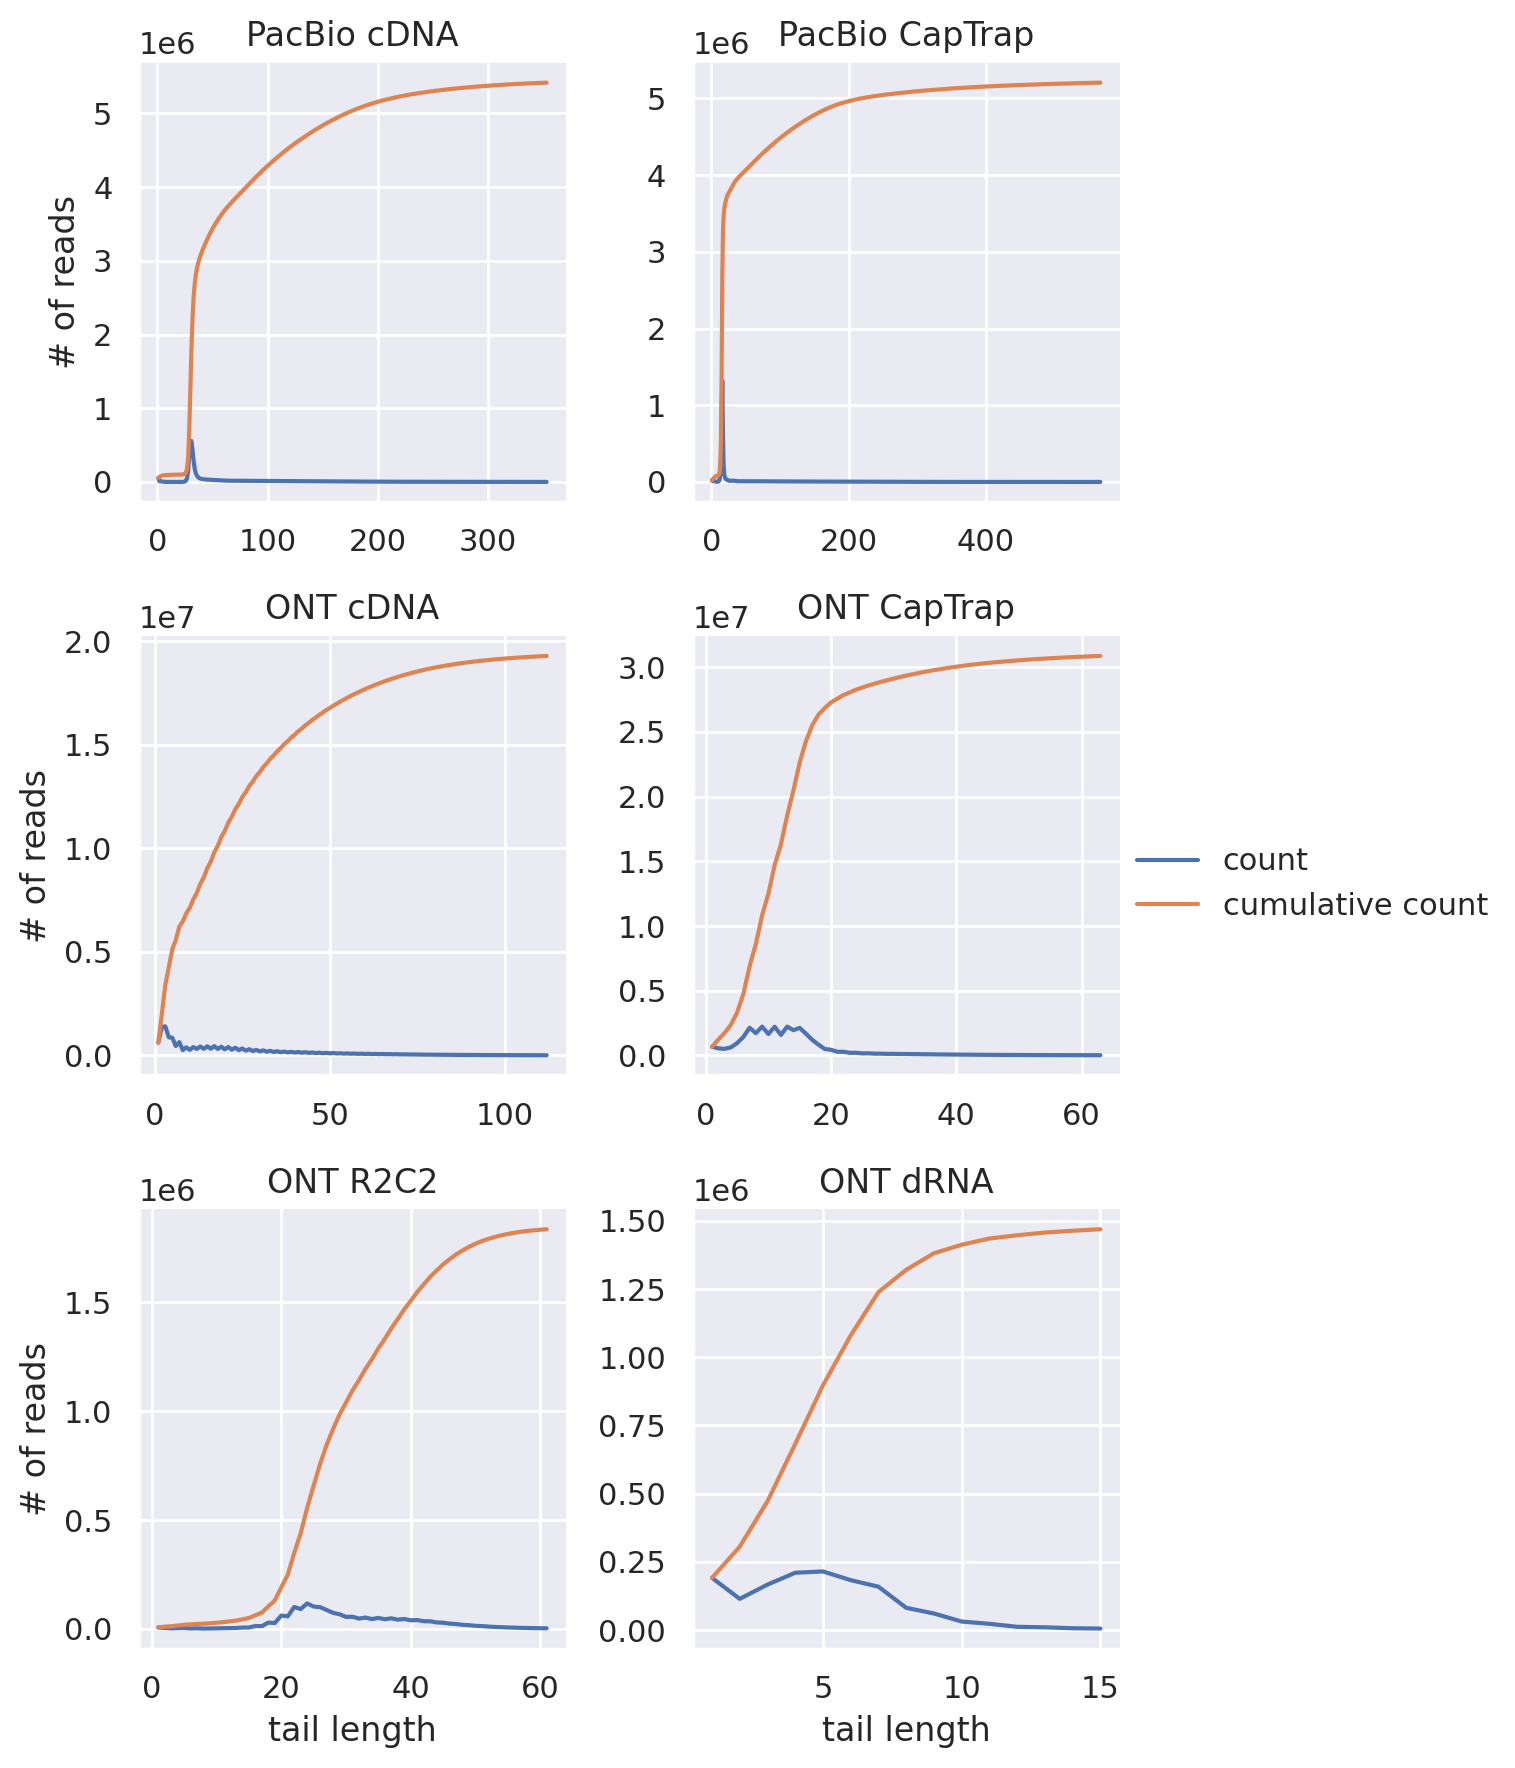

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 6), 'figure.dpi': 200})

g = sns.FacetGrid(df, col="data_source", col_wrap=2, sharex=False, 
                  sharey=False)
g.map(sns.lineplot, 'tail length', '# of reads', 'stats')
g.set_titles("{col_name}")
g.add_legend()
sns.despine()

plt.savefig(snakemake.output['fig'], bbox_inches = "tight", dpi=200)

In [6]:
df = pd.concat([
    pd.read_csv(i)
    for i in snakemake.input['counts']
])

In [7]:
import numpy as np

counts = dict()

for i in df['data_source'].unique():
    counts[i] = np.median([
        row.len
        for row in df[df['data_source'] == i].itertuples()
        for _ in range(row.count)
    ])

In [8]:
pd.Series(counts).astype(int).to_csv(snakemake.output['median_count'], header=False)